In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [64]:
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
stops = set(stopwords.words('english' ))

 


In [66]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


File ‘bbc_text_cls.csv’ already there; not retrieving.



In [67]:
stops = stops.union({'said', '‘would', 'could', 'told', 'also', 'one','mr', 'new', 'year', })
df = pd.read_csv('bbc_text_cls.csv')
df.head()



,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [68]:
vectorizer = CountVectorizer(stop_words=stops)


In [69]:
X=vectorizer.fit_transform(df['text'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['would'] not in stop_words.
  warnings.warn(


In [70]:
lda = LatentDirichletAllocation(
      n_components=10, # default: 10
      random_state=12345,
) 

In [71]:
lda.fit(X)

 

LatentDirichletAllocation(random_state=12345)

In [72]:

def plot_top_words(model, feature_names, n_top_words=10):
 fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
 axes = axes.flatten()
 for topic_idx, topic in enumerate(model.components_):
  top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
  top_features = [feature_names[i] for i in top_features_ind]
  weights = topic[top_features_ind]
  ax = axes[topic_idx]
  ax.barh(top_features, weights, height=0.7)
  ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
  ax.invert_yaxis()
  ax.tick_params(axis="both", which="major", labelsize=20)
  for i in "top right left".split():
    ax.spines[i].set_visible(False)

  fig.suptitle('LDA', fontsize=40)


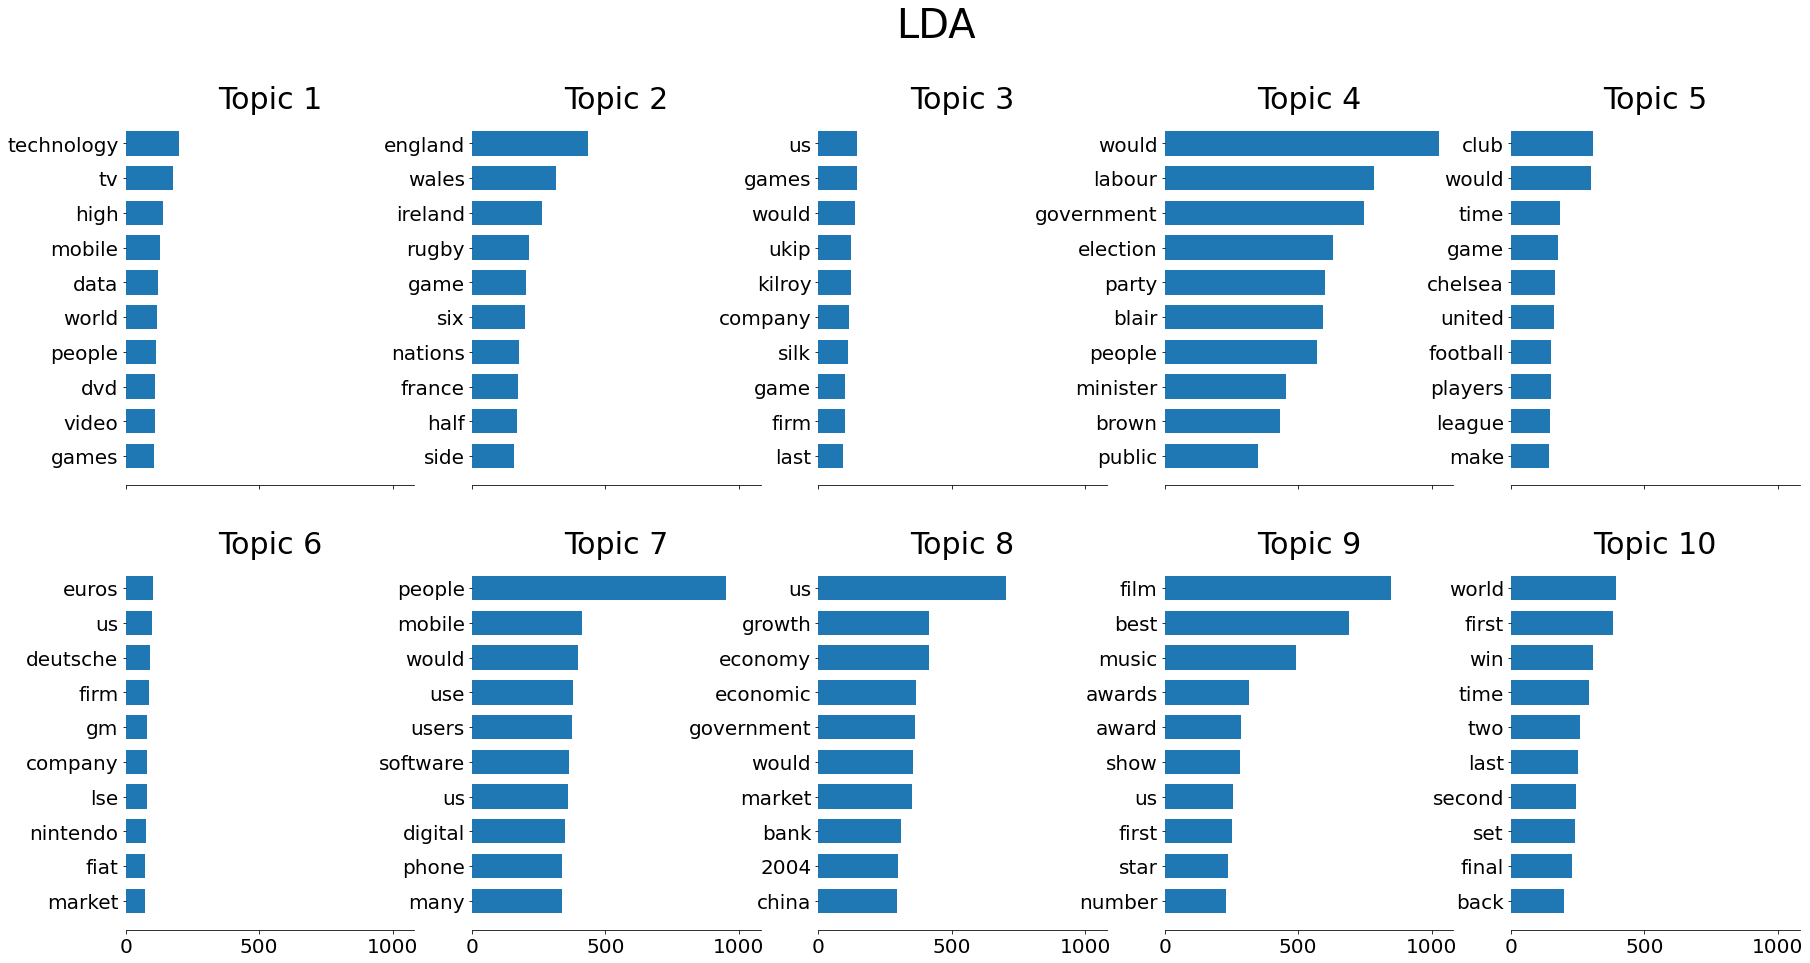

In [73]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names);
 

In [74]:
Z = lda.transform(X)




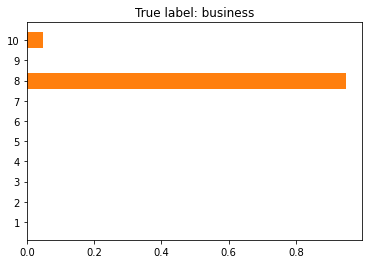

In [75]:
np.random.seed(9)
i = np.random.choice(len(df) )
z=Z[i]
topics = np.arange(10) + 1
fig, ax = plt.subplots()
ax.barh(topics, z)
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels']);

In [76]:
def wrap(x):
 return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Fed warns of more US rate rises

The US looks set for a continued
boost to interest rates in 2005, according to the Federal Reserve.
Minutes of the December meeting which pushed rates up to 2.25% showed
that policy-makers at the Fed are worried about accelerating
inflation.  The clear signal pushed the dollar up to $1.3270 to the
euro by 0400 GMT on Wednesday, but depressed US shares.  "The markets
are starting to fear a more aggressive Fed in 2005," said Richard
Yamarone of Argus Research.  The Dow Jones index dropped almost 100
points on Tuesday, with the Nasdaq also falling as key tech stocks
were hit by broker downgrades.  The dollar also gained ground against
sterling on Tuesday, reaching $1.8832 to the pound before slipping
slightly on Wednesday morning.

The release of the minutes just three
weeks after the 14 December meeting was much faster than usual,
indicating the Fed wants to keep markets more apprised of its
thinking.  This, too, is being taken in some quarters as a sign 

Text(0.5, 1.0, 'True label: tech')

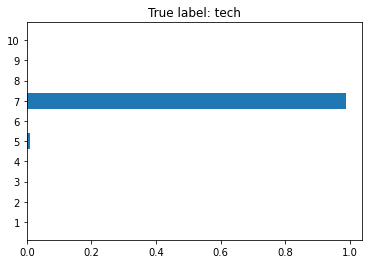

In [79]:
np.random.seed(11)
i=np.random.choice(len(df) )
z=Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])




In [80]:
print(wrap(df.iloc[i]['text']))

Concerns over Windows ATMs

Cash machine networks could soon be more
susceptible to computer viruses, a security firm has warned.

The
warning is being issued because many banks are starting to use the
Windows operating system in machines.  Already there have been four
incidents in which Windows viruses have disrupted networks of cash
machines running the Microsoft operating system.  But banking experts
say the danger is being overplayed and that the risks of infection and
disruption are small.

For many years the venerable IBM operating
system, known as OS/2, has been the staple software used to power many
of the 1.4m cash machines in operation around the world.  But IBM will
end support for OS/2 in 2006 which is forcing banks to look for
alternatives.  There are also other pressures making banks turn to
Windows said Dominic Hirsch, managing director of financial analysis
firm Retail Banking Research.

He said many cash machines will also
have to be upgraded to make full use of the ne

In [ ]:
## nmf

In [82]:
stops = set(stopwords.words('english' ))
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
stops = stops.union({'said', '‘would', 'could', 'told', 'also', 'one','mr', 'new', 'year', })
df = pd.read_csv('bbc_text_cls.csv')
df.head()


File ‘bbc_text_cls.csv’ already there; not retrieving.



,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [83]:
vectorizer = TfidfVectorizer(stop_words=stops)
X=vectorizer.fit_transform(df['text'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['would'] not in stop_words.
  warnings.warn(


In [84]:
nmf = NMF(
    n_components=10, # default: 10

    beta_loss="kullback-leibler",
    solver='mu',
    random_state=0,
)

In [86]:
nmf.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

In [88]:
def plot_top_words(model, feature_names, n_top_words=10):
 fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
 axes = axes.flatten()
 for topic_idx, topic in enumerate(model.components_):
  top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
  top_features = [feature_names[i] for i in top_features_ind]
  weights = topic[top_features_ind]
  ax = axes[topic_idx]
  ax.barh(top_features, weights, height=0.7)
  ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
  ax.invert_yaxis()
  ax.tick_params(axis="both", which="major", labelsize=20)
  for i in "top right left".split():
    ax.spines[i].set_visible(False)

  fig.suptitle('NMF', fontsize=40)

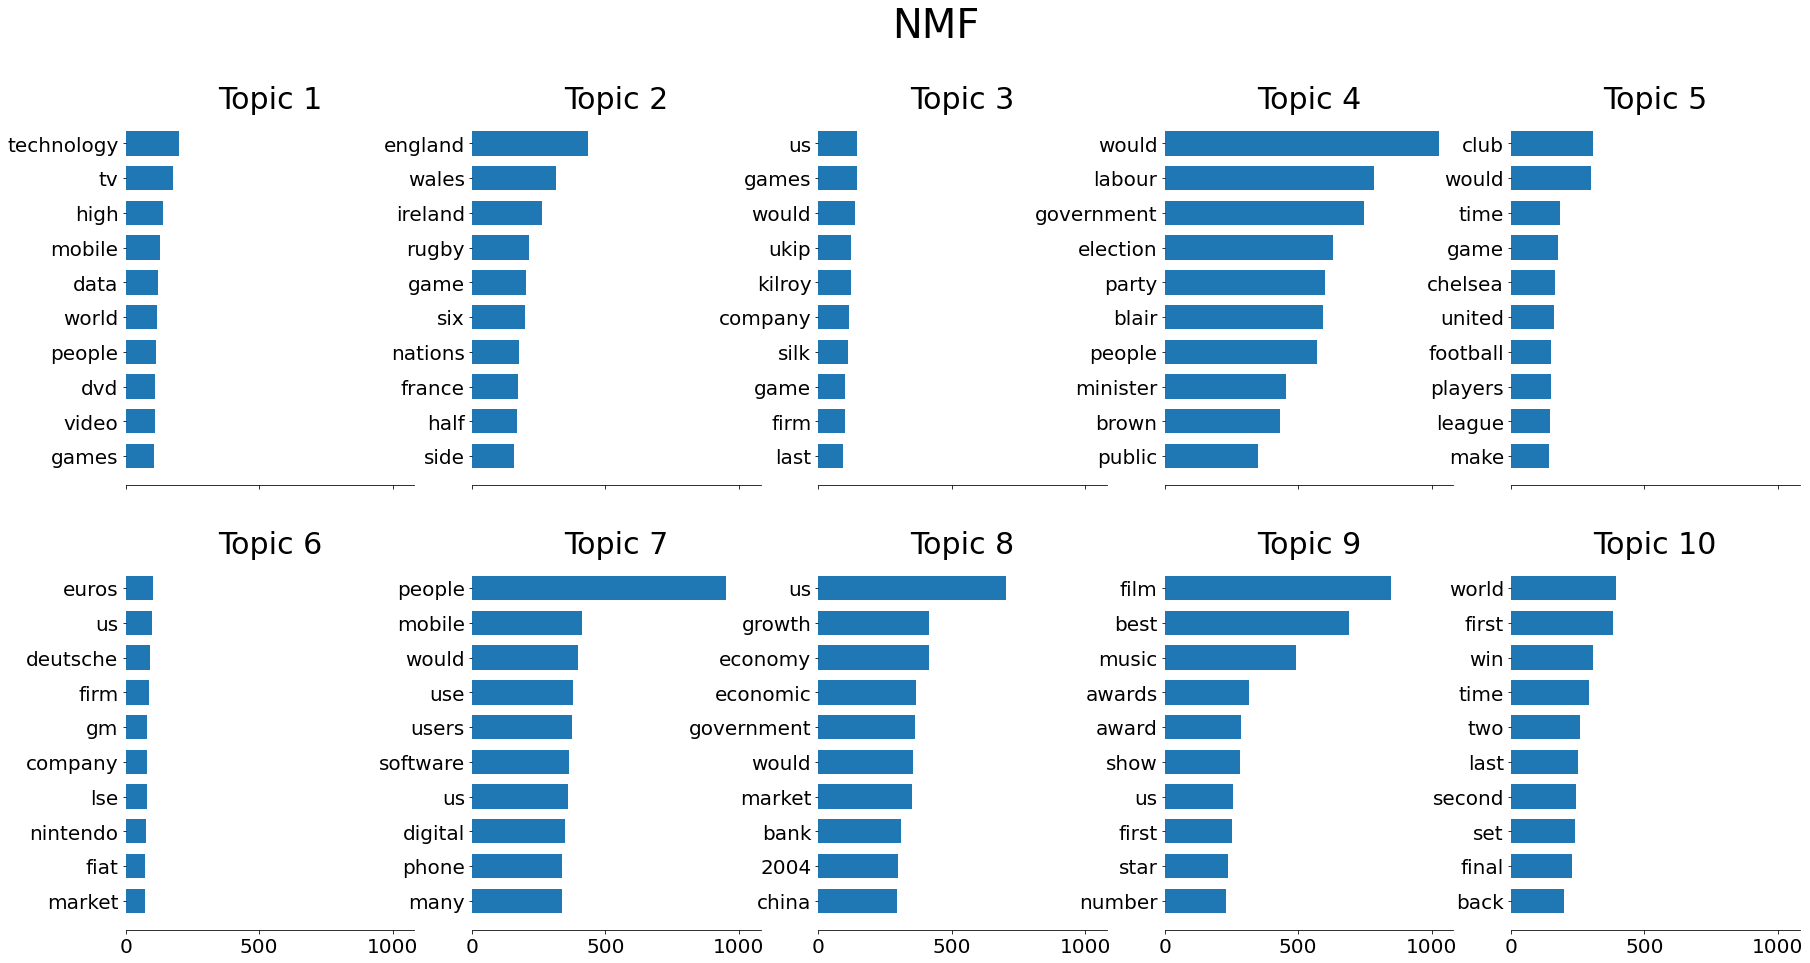

In [89]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names);

In [90]:
Z=nmf.transform(X)

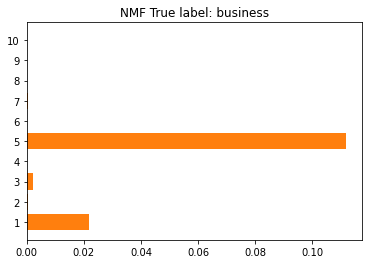

In [92]:
np.random.seed(9)
i = np.random.choice(len(df) )
z=Z[i]
topics = np.arange(10) + 1
fig, ax = plt.subplots()
ax.barh(topics, z)
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('NMF True label: %s' % df.iloc[i]['labels']);

In [93]:
def wrap(x):
 return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Fed warns of more US rate rises

The US looks set for a continued
boost to interest rates in 2005, according to the Federal Reserve.
Minutes of the December meeting which pushed rates up to 2.25% showed
that policy-makers at the Fed are worried about accelerating
inflation.  The clear signal pushed the dollar up to $1.3270 to the
euro by 0400 GMT on Wednesday, but depressed US shares.  "The markets
are starting to fear a more aggressive Fed in 2005," said Richard
Yamarone of Argus Research.  The Dow Jones index dropped almost 100
points on Tuesday, with the Nasdaq also falling as key tech stocks
were hit by broker downgrades.  The dollar also gained ground against
sterling on Tuesday, reaching $1.8832 to the pound before slipping
slightly on Wednesday morning.

The release of the minutes just three
weeks after the 14 December meeting was much faster than usual,
indicating the Fed wants to keep markets more apprised of its
thinking.  This, too, is being taken in some quarters as a sign 